## This notebook plots the allocations of the portfolios in each pareto front

In [21]:
import matplotlib.pyplot as plt
import json
import numpy as np
import pandas as pd
import seaborn as sns

In [22]:
df = pd.read_csv('../../data/final_daily_returns_asset_classes.csv', index_col=0)
df.index = pd.to_datetime(df.index)

In [23]:
asset_classes = ['RE', 'PE','Equity', 'IG CB', 'GB', 'HY CB', 'Money']

In [24]:
def load_pareto_fronts(json_file):
    with open(json_file, 'r') as file:
        data = json.load(file)
    
    all_runs = []
    for entry in data:
        pareto_front = []
        for solution in entry.get("solutions", []):
            # Ensure solution is a dictionary
            if isinstance(solution, dict):
                pareto_front.append({
                    "weights": solution.get("weights", []),
                    "expected_return": solution.get("expected_return", 0),
                    "SCR_risk": solution.get("SCR_risk", 0),
                    "risk_measure": solution.get("risk_measure", ""),
                    "distribution": solution.get("distribution", ""),
                    "period": solution.get("period", [])
                })
        all_runs.append(pareto_front)
    return all_runs

json_file_path = "../pareto_front_results.json"
pareto_fronts = load_pareto_fronts(json_file_path)

SCENARIO = cvar - tstudent - ['2020-01-01', '2021-01-01']


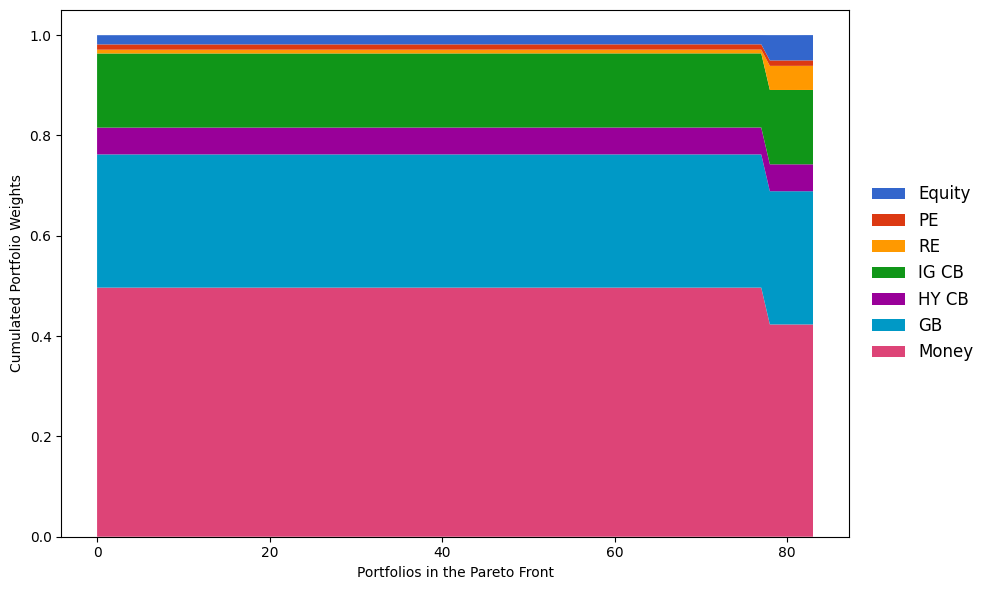

SCENARIO = var - normal - ['2020-01-01', '2021-01-01']


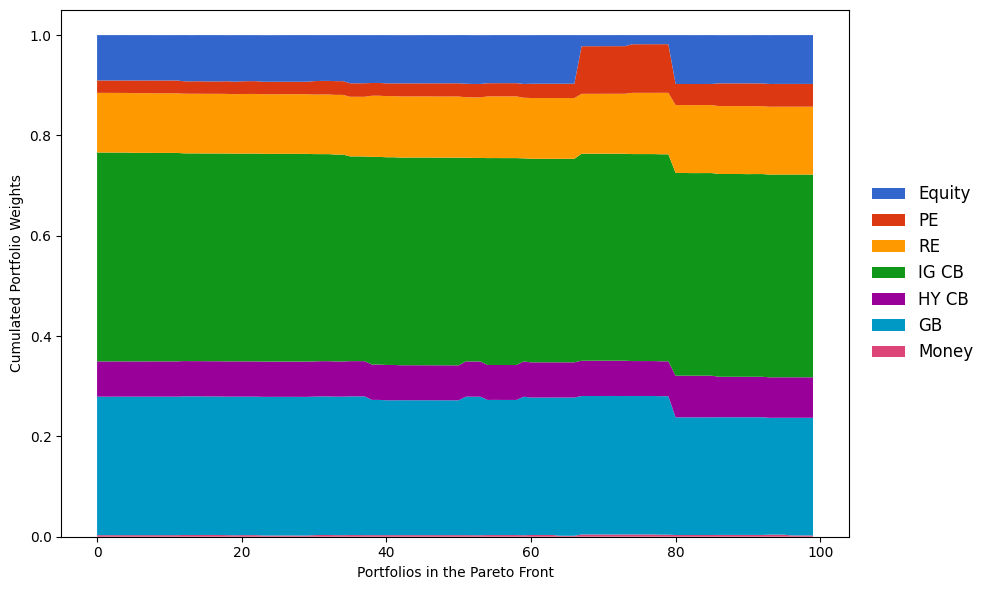

SCENARIO = cvar - normal - ['2020-01-01', '2021-01-01']


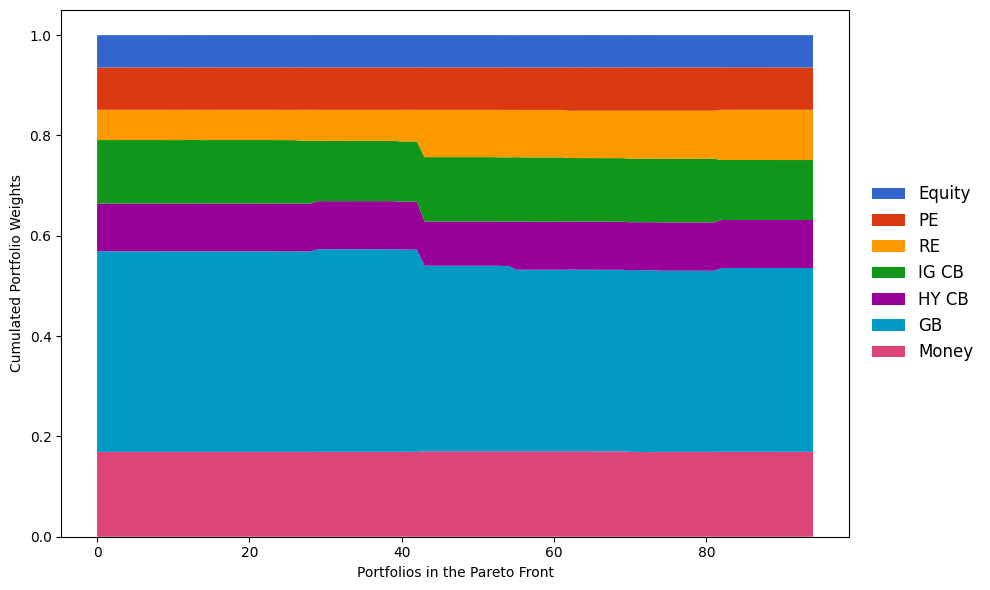

SCENARIO = var - tstudent - ['2020-01-01', '2021-01-01']


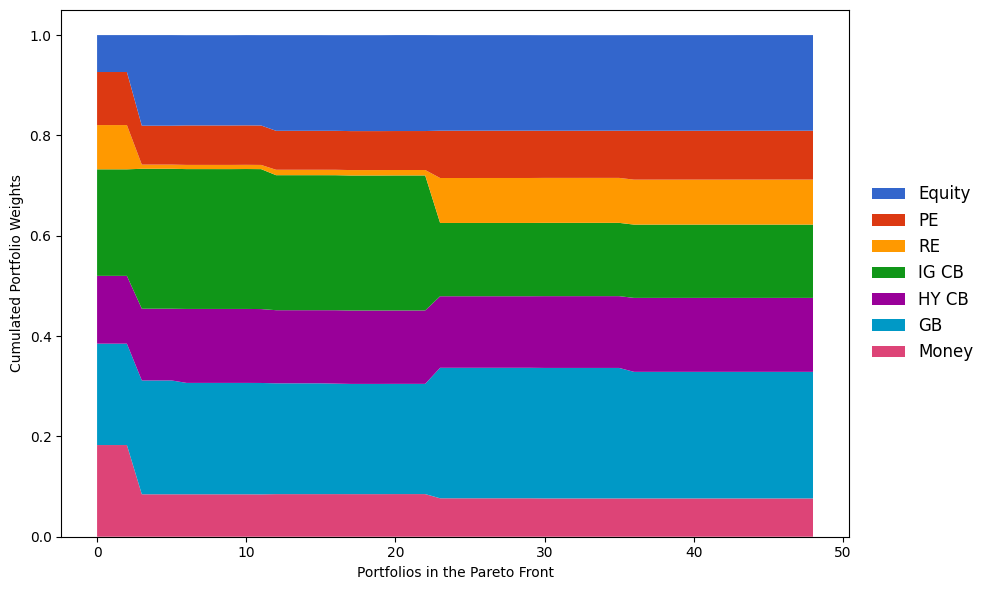

SCENARIO = cvar - tstudent - ['2007-06-01', '2008-06-01']


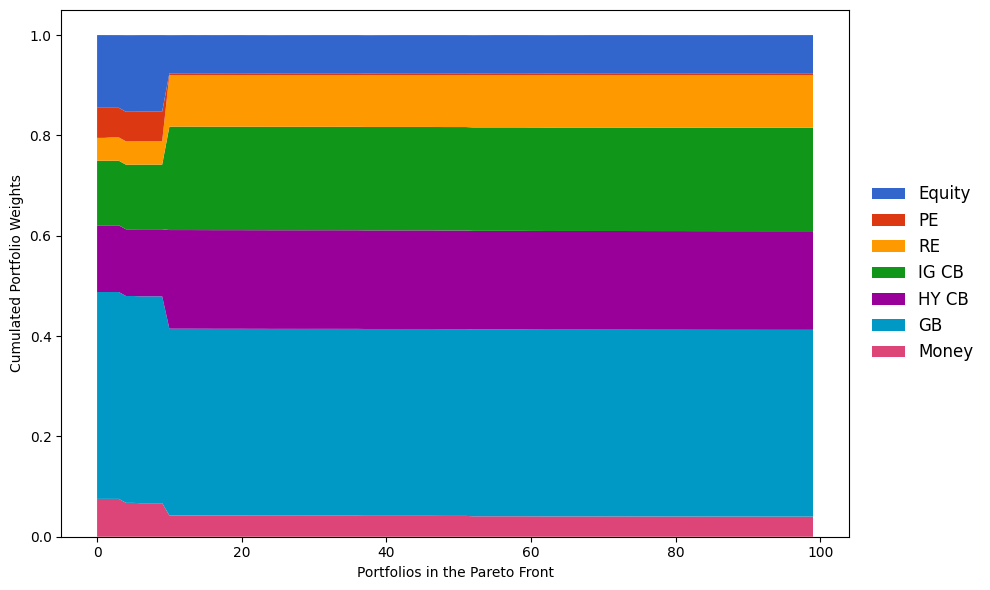

SCENARIO = var - normal - ['2007-06-01', '2008-06-01']


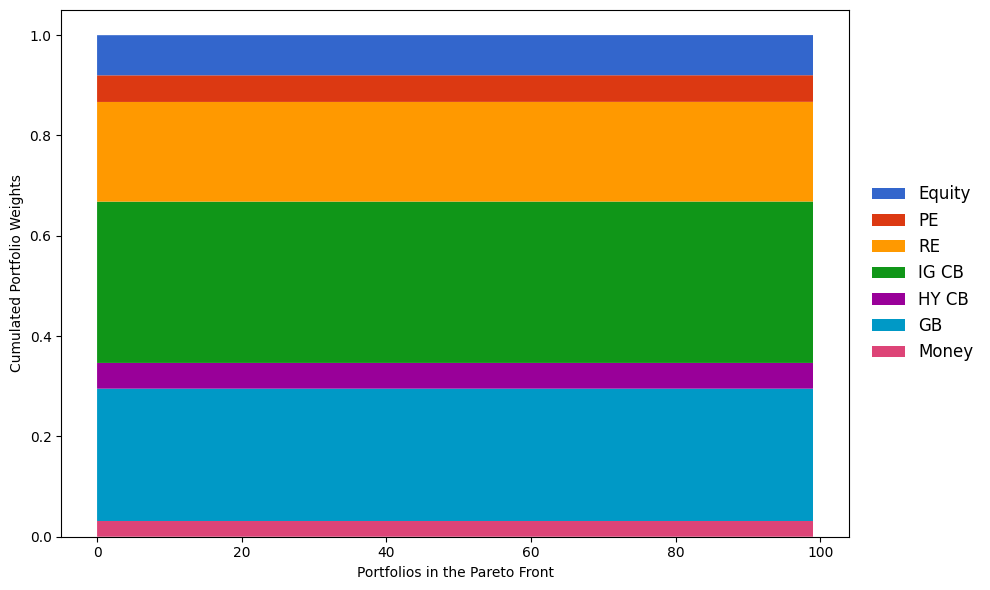

SCENARIO = cvar - normal - ['2007-06-01', '2008-06-01']


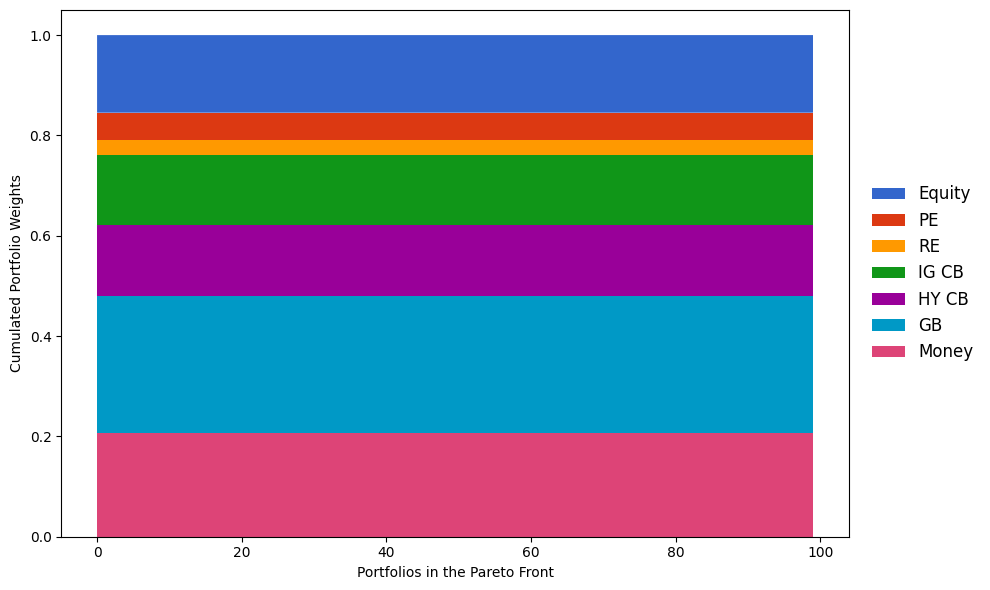

SCENARIO = var - tstudent - ['2007-06-01', '2008-06-01']


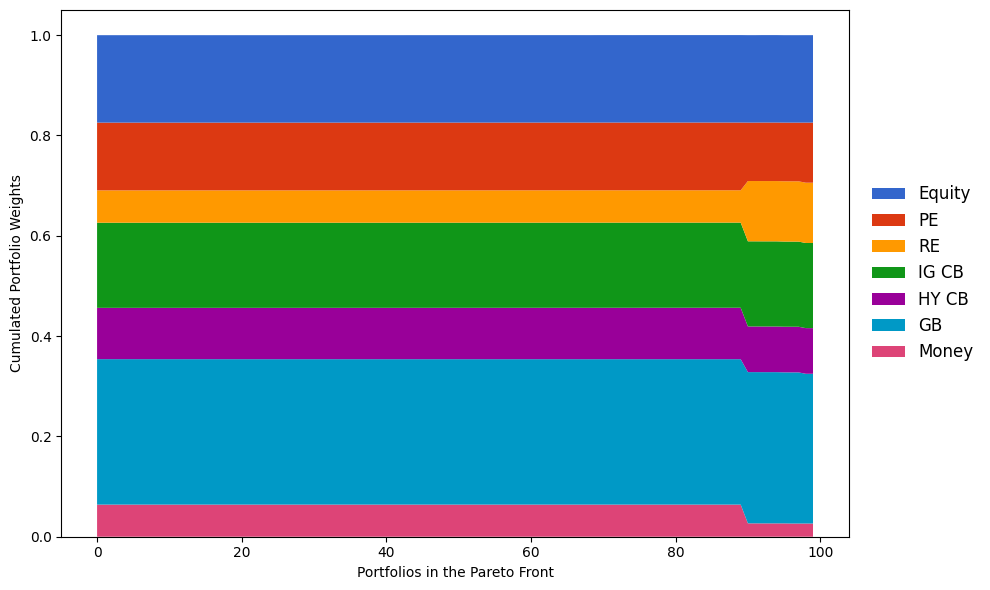

SCENARIO = var - normal - ['2023-11-01', '2024-11-01']


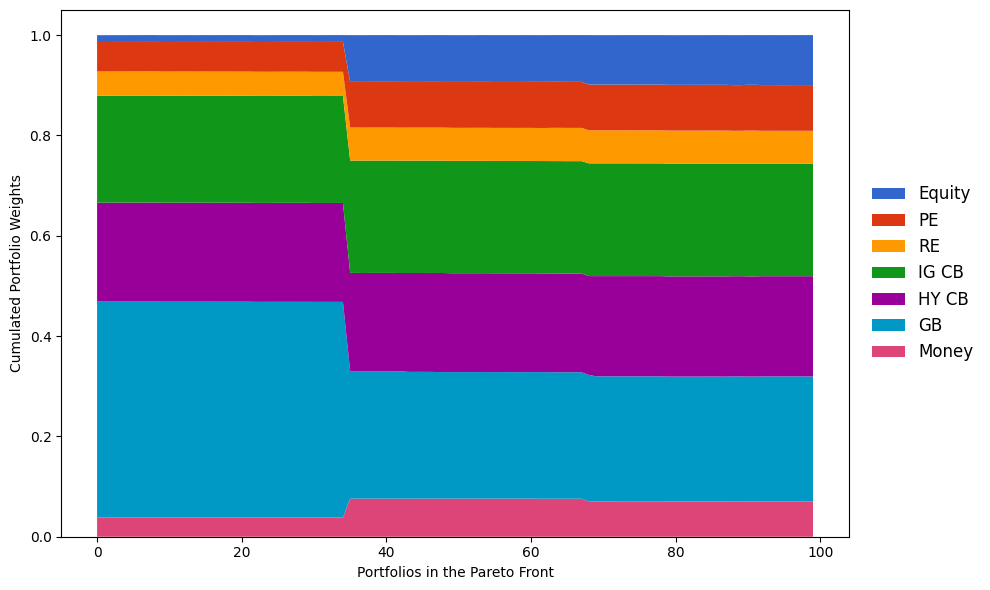

SCENARIO = cvar - normal - ['2023-11-01', '2024-11-01']


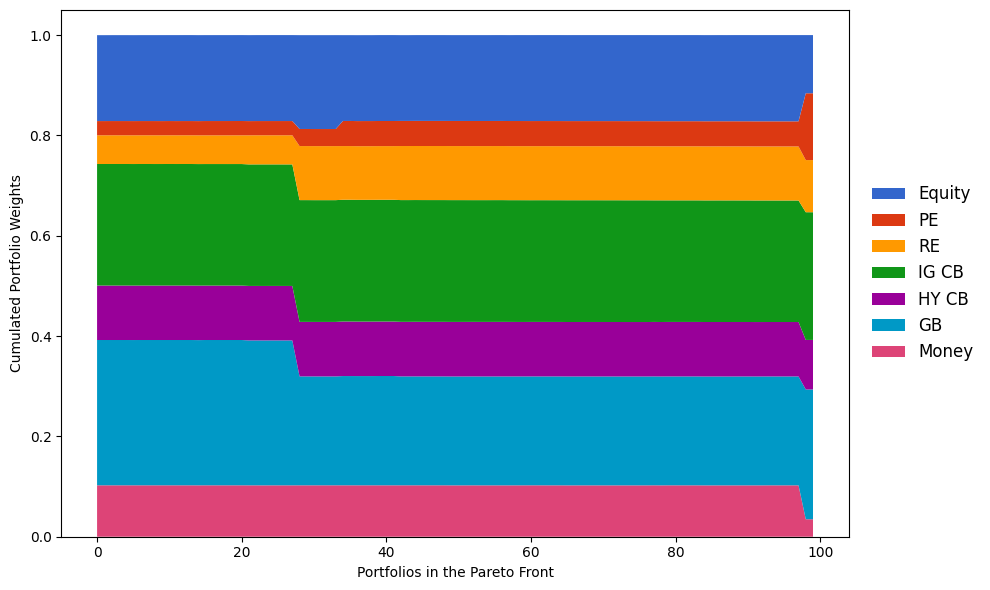

SCENARIO = var - tstudent - ['2023-11-01', '2024-11-01']


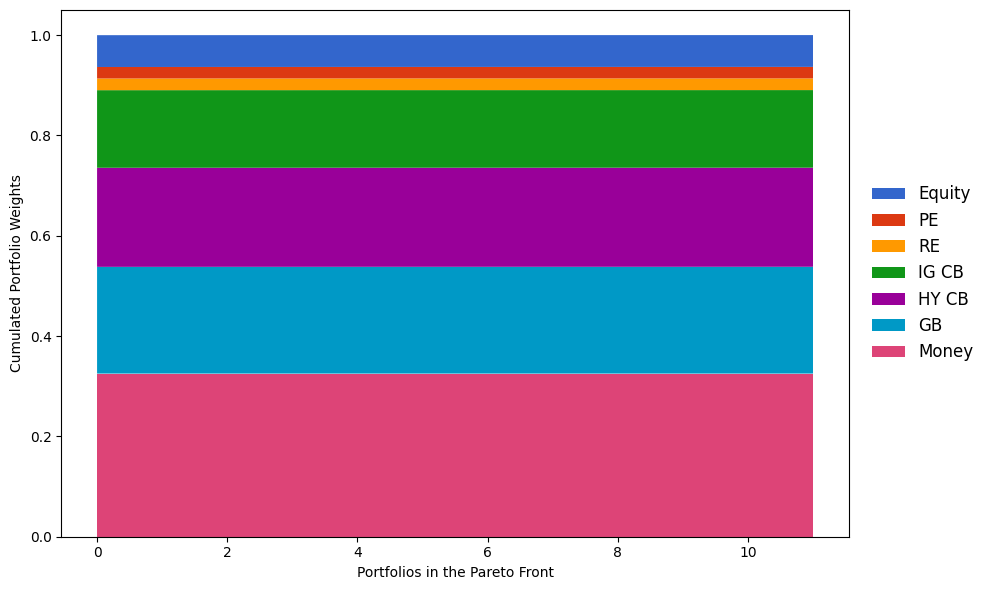

In [25]:
# Define colors for each asset class
ordered_asset_classes = ["Equity", "PE", "RE", "IG CB", "HY CB", "GB", "Money"]
ordered_asset_classes.reverse()
asset_colors = {
    "Equity": "#3366CC",
    "PE": "#DC3912",
    "RE": "#FF9900",
    "IG CB": "#109618",
    "HY CB": "#990099",
    "GB": "#0099C6",
    "Money": "#DD4477"
}

# Ensure asset_classes is defined in the same order as the colors above
for i, pareto_front in enumerate(pareto_fronts):
    # Sort the Pareto front by SCR_risk in ascending order
    sorted_pareto_front = sorted(pareto_front, key=lambda x: x["SCR_risk"])

    # Extract weights for the sorted Pareto front
    all_weights = [solution["weights"] for solution in sorted_pareto_front]

    risk_measure = sorted_pareto_front[0]["risk_measure"]
    distribution = sorted_pareto_front[0]["distribution"]
    period = sorted_pareto_front[0]["period"]
    scenario_text = f"{risk_measure} - {distribution} - {period}"
    print("SCENARIO =", scenario_text)

    # Portfolio numbers for the x-axis
    portfolio_numbers = range(len(all_weights))

    # Create a DataFrame for the current Pareto front
    df_weights = pd.DataFrame(
        all_weights, columns=asset_classes, index=portfolio_numbers)

    # Reorder the columns according to the desired order
    df_weights = df_weights[ordered_asset_classes]

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.stackplot(
        df_weights.index,
        df_weights.T,
        labels=ordered_asset_classes,
        colors=[asset_colors[asset] for asset in ordered_asset_classes]
    )

    # Customize the plot
    plt.xlabel("Portfolios in the Pareto Front")
    plt.ylabel("Cumulated Portfolio Weights")
    #plt.title(f"Pareto Front {i+1} - Portfolio Allocations")
    handles, labels = plt.gca().get_legend_handles_labels()
    handles = list(reversed(handles))
    labels = list(reversed(labels))
    plt.legend(
        handles,
        labels,
        loc='center left',  # Place the legend outside the plot area
        bbox_to_anchor=(1.01, 0.5),  # Adjust the position relative to the plot
        fontsize=12,
        frameon=False
    )
    #plt.grid(axis='x', linestyle='--', color='gray', alpha=0.7)

    # Save or display the plot
    plt.tight_layout()
    plt.show()